# Jake Daongam - 25750803

## Research question/interests

- Can rest account for any differences between predicted and actual outcomes?
- Is there any teams that play better during back to back games? 
- Who are the best underdog teams?

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)

In [ ]:
df = pd.read_csv("../data/raw/nhl_elo_2022.csv")
df.head()

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,overtime_prob,home_team_expected_points,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,0.230501,1.311921,0.918273,2,6,1561.096238,1545.711971,95,35,65
1,2022,2021-10-12,0,0,post,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,...,0.223453,1.408418,0.815100,4,3,1561.989596,1488.285485,72,37,54
2,2022,2021-10-13,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,0.230758,1.308496,0.922343,2,1,1532.563546,1501.851125,63,67,65
3,2022,2021-10-13,0,0,post,NaN,Washington Capitals,New York Rangers,WSH,NYR,...,0.231828,1.293629,0.938377,5,1,1535.936730,1507.136428,68,80,74
4,2022,2021-10-13,0,0,post,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,...,0.221429,1.435292,0.786233,4,2,1567.566728,1480.104248,70,30,50


## Milestone 3 task 1: Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,1401.0,2022.000000,0.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000
playoff,1401.0,0.063526,0.243994,0.000000,0.000000,0.000000,0.000000,1.000000
neutral,1401.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
home_team_pregame_rating,1401.0,1508.771193,52.955007,1399.418091,1460.874687,1513.279154,1554.049915,1631.676028
away_team_pregame_rating,1401.0,1508.743887,52.904091,1396.925277,1461.013613,1514.439258,1553.575066,1633.950631
home_team_winprob,1401.0,0.569705,0.099804,0.294438,0.499517,0.572543,0.642184,0.798289
away_team_winprob,1401.0,0.430295,0.099804,0.201711,0.357816,0.427457,0.500483,0.705562
overtime_prob,1401.0,0.231665,0.008750,0.204465,0.226127,0.233155,0.238859,0.244079
home_team_expected_points,1401.0,1.239719,0.174404,0.742925,1.121162,1.245643,1.365458,1.637821
away_team_expected_points,1401.0,0.991946,0.180698,0.566644,0.861169,0.989604,1.122858,1.475410


Text(0.5, 1.0, 'Correlation between data columns')

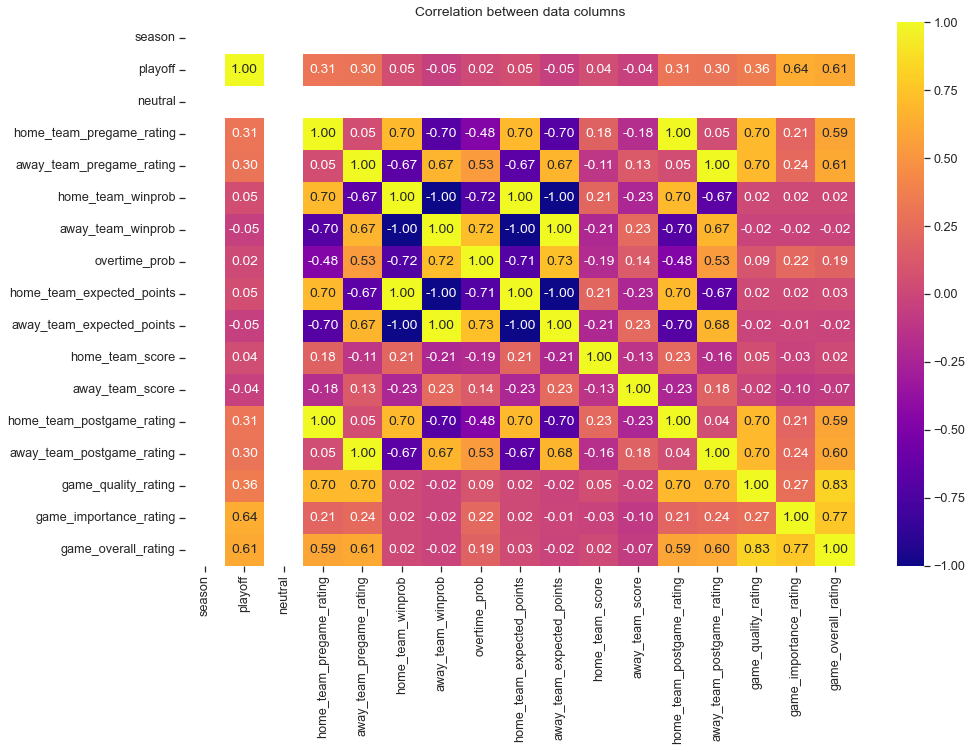

In [ ]:
corr = df.corr()# plot the heatmap
plt.figure(figsize=(15,10))
sns.set_theme(style="ticks", font_scale=1.15)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, fmt='.2f', annot=True, cmap='plasma')
plt.title("Correlation between data columns")

# Correlation heatmap

There are a few interesting trends that appear in the correlation map. The obvious ones are that home and away ratings are positively correlated with the corresponding win probabilities, also that ratings are loosely correlated to the points they will score. The interesting one I found was that the overtime probability was posititely correlated with the away team's win probability! Game importance which is a score on how much the result will affect playoff odds is interesting since it doesnt seem to be correlated to any other column, so 538 must have more data that they aren't sharing!

# Notes

Definitions of the ratings from the 538 site:
- Quality rating is determined by the harmonic mean of the teams’ Elo ratings
- Importance rating is determined by how much the result will affect playoff odds
- Overall rating is determined by the average of quality and importance

The quality rating, importance rating, and overall rating will range around:
- Quality rating = 49.9 +/- 33.8
- Importance rating = 25.8 +/- 29.5
- Overall rating = 37.6 +/- 25.3

In [ ]:
df["ratingDiff"] = df["home_team_postgame_rating"] - df["away_team_postgame_rating"]
df["scoreDiff"] = df["home_team_score"] - df["away_team_score"]

I added two columns to see if the rating differential or score differential had any interesting correlations to the other columns.

In [ ]:
df.head()

,season,date,playoff,neutral,status,ot,home_team,away_team,home_team_abbr,away_team_abbr,...,away_team_expected_points,home_team_score,away_team_score,home_team_postgame_rating,away_team_postgame_rating,game_quality_rating,game_importance_rating,game_overall_rating,ratingDiff,scoreDiff
0,2022,2021-10-12,0,0,post,NaN,Tampa Bay Lightning,Pittsburgh Penguins,TBL,PIT,...,0.918273,2,6,1561.096238,1545.711971,95,35,65,15.384268,-4
1,2022,2021-10-12,0,0,post,NaN,Vegas Golden Knights,Seattle Kraken,VEG,SEA,...,0.815100,4,3,1561.989596,1488.285485,72,37,54,73.704111,1
2,2022,2021-10-13,0,0,post,NaN,Toronto Maple Leafs,Montreal Canadiens,TOR,MTL,...,0.922343,2,1,1532.563546,1501.851125,63,67,65,30.712421,1
3,2022,2021-10-13,0,0,post,NaN,Washington Capitals,New York Rangers,WSH,NYR,...,0.938377,5,1,1535.936730,1507.136428,68,80,74,28.800302,4
4,2022,2021-10-13,0,0,post,NaN,Colorado Avalanche,Chicago Blackhawks,COL,CHI,...,0.786233,4,2,1567.566728,1480.104248,70,30,50,87.462480,2


<AxesSubplot:xlabel='ratingDiff', ylabel='overtime_prob'>

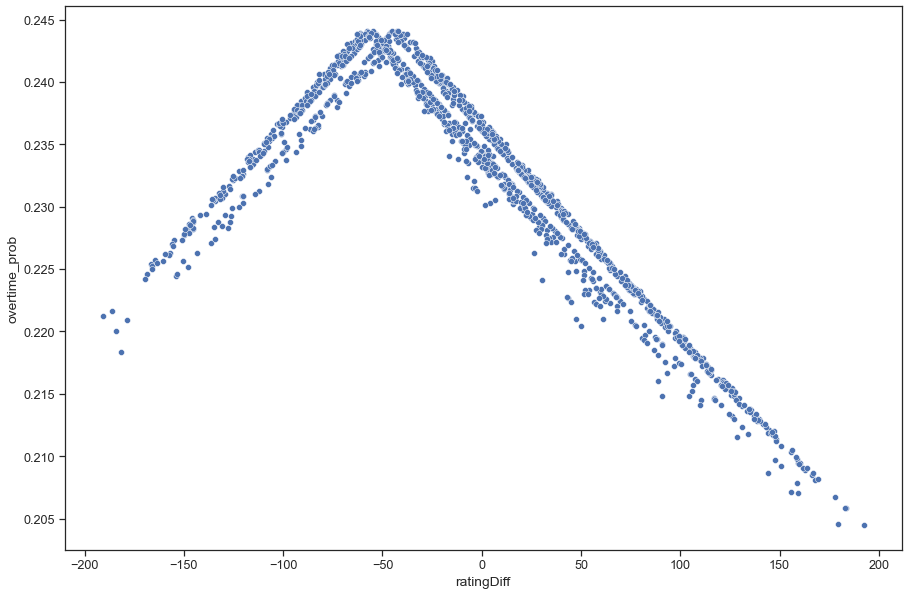

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='ratingDiff', y='overtime_prob')

### Scatterplot of overtime probability and rating difference (home rating - away rating)

While the overtime probability is directly correlated to the ratings, it's interesting to see that the highest probability of overtime occurs when the home team has a ~50 point disadvantage to the away team! I assume this is because being the home team gives an advantage, so this helps us see that the advantage is around 50 points

In [ ]:
reg_season = df[df["playoff"]==0]
ot_df = reg_season[(reg_season["ot"] == "OT") | (reg_season["ot"] == "SO")]

[Text(0, 0.5, 'Total overtime games')]

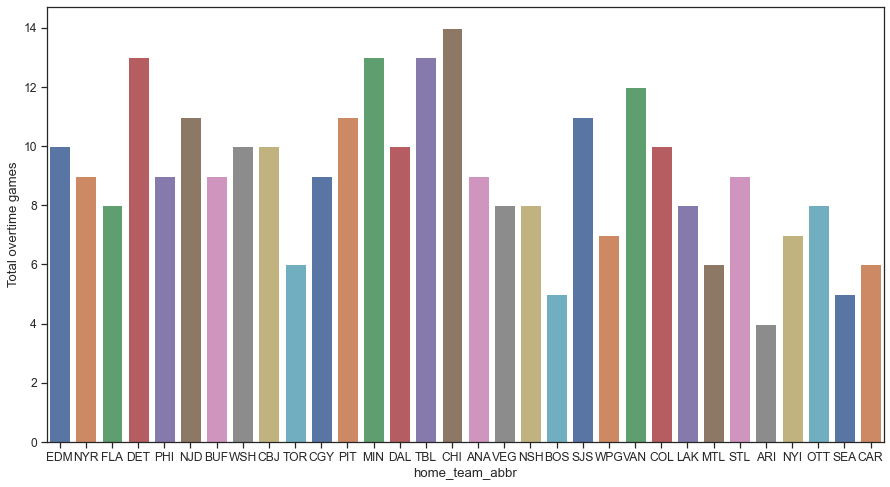

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="ticks", font_scale=1.1)
sns.countplot(data=ot_df, x='home_team_abbr', palette='deep').set(
    ylabel='Total overtime games')

### Number of home games that go into overtime or a shootout

Following the previous scatterplot, I wanted to see if my conclusion that teams with a -50 rating differential had the most overtimes. Here I plotted the amount of times teams went into either overtime or a shootout in the regular season. Chicago, Detroit, Minnesota and Tampa were leading the count! The first two make sense as they were average to below average teams during the 2021 season, but Minnesota and Tampa were both top 3 in their division. Very interesting

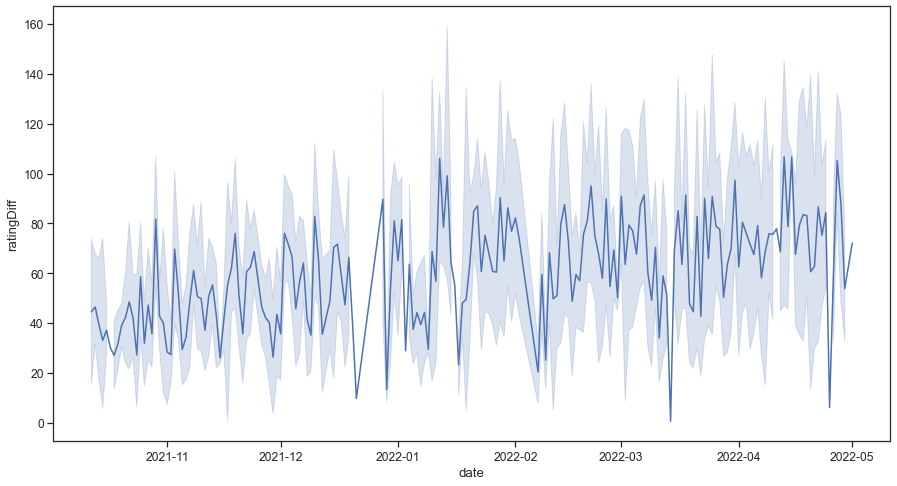

In [18]:
pd.set_option('mode.chained_assignment', None)

plt.figure(figsize=(15,8))
reg_season['date'] = pd.to_datetime(reg_season['date'], format = '%Y-%m-%d')
sns.lineplot(data=reg_season, x='date', y=reg_season['ratingDiff'].abs())

pd.reset_option("mode.chained_assignment")

### Rating difference throughout the season

This graph is interesting to delve into, since the 538 algorithm works by setting most of the teams around the same rating at the start of the year with a little deviation in ratings based on the previous year. As the year goes on, teams start to deviate from the mean as good teams keep gaining points from winning and bad teams continually lose points from losing. An interesting question that is brought up in this graph that is covered in Andrei's notebook is "when in the season can we have confidence in the predictions?"

# Task 2: Set up Analysis Pipeline

### Steps required
1. Load data
1. Clean data and process Data for my analysis

In [62]:
# #Clean and process data

# df = pd.read_csv("../data/raw/nhl_elo_2022.csv")

# # Changed null values in ot column to 'reg' because null values break a lot of things
# df.loc[(df['ot'].isnull()), 'ot'] = 'reg'

# # Wanting to evaluate each game from both team's sides, so need to repeat each game so it can count
# # as a W for one team, and an L/OTL for the other team
# df = df.loc[df["date"].index.repeat(2),:].reset_index(drop=True)

# # Dropping season column because only analyzing 2021-2022 season
# # Dropping neutral column because no games were played at a neutral arena
# # Dropping status column because every game has been played already
# # Only including regular season games so every team can be equally evaluated
# df = (df.drop(columns=["season", "neutral", "status"])
#         .loc[df["playoff"] == 0]
#         .reset_index(drop=True)
# )

# # Adding team and abbreviation column because we are analyzing each team separately
# df["team"] = np.where(df.index % 2, df["away_team"], df["home_team"] )
# df["abbr"] = np.where(df.index % 2, df["away_team_abbr"], df["home_team_abbr"] )

# # Sort table to have blocks of each team's season ordered by the date
# df = (df.sort_values(by=['team', 'date'], ascending=True)
#         .reset_index(drop=True)
# )

# # Drop playoff column since we are only looking at regular season games
# df = df.drop(columns=['playoff'])

# # Renaming some columns so they aren't so long
# df.rename(columns={"home_team_pregame_rating": "home_pre_rating",
#                "away_team_pregame_rating": "away_pre_rating",
#                "home_team_winprob": "home_winprob",
#                "away_team_winprob": "away_winprob",
#                "home_team_score": "home_score",
#                "away_team_score": "away_score",
#                "home_team_postgame_rating": "home_post_rating",
#                "away_team_postgame_rating": "away_post_rating"
#               })

# # Adding in a game number count by populating a list with 1-82 repeating for total table size
# # then adding it in as a column
# count = 1
# gameCount = []
# for i in range(1,2625):
#     if count==83:
#         count = 1
#     gameCount.append(count)
#     count += 1
# df['game_num'] = gameCount
    
    
# # add in days of rest between games for analysis!
# # Easiest way is to append date of last game onto row and subtract them from eachother, so append
# # previous game's date by using shift function

# # First, need to convert date from string to DateTime to allow for operations to be complete on dates
# df['date'] = pd.to_datetime(df['date'])
# df['last_game_date'] = df['date'].shift()

# # Based on how the spreadsheet is laid out, there is an issue where the first game of each team will
# # be taking the last game of the previous team. Fixed this by setting team's first game to NaN
# df.loc[df['game_num'] == 1, 'last_game_date'] = np.nan

# df['team_rating'] = np.where(df["abbr"]==df["home_team_abbr"], df['home_team_pregame_rating'], df['away_team_pregame_rating'])
# df['opposing_team_rating'] = np.where(df["abbr"]==df["home_team_abbr"], df['away_team_pregame_rating'], df['home_team_pregame_rating'])

# df['gf'] = np.where(df["abbr"]==df["home_team_abbr"], df['home_team_score'], df['away_team_score'])
# df['ga'] = np.where(df["abbr"]==df["home_team_abbr"], df['away_team_score'], df['home_team_score'])

# df['team_rating'] = df['team_rating'].astype('float64')
# df['opposing_team_rating'] = df['opposing_team_rating'].astype('float64')

# df['rating_diff'] = df['team_rating'] - df['opposing_team_rating']

# #Calculate rest days by subtracting game date by last game date
# df['rest_days'] = np.where(df['last_game_date']!= np.nan, ((df['last_game_date'] - df['date'])*-1).dt.days, "NA")
# df['rest_days'] = df['rest_days'].astype('string')

# #Need to add outcomes of Games with a couple where statement
# df['game_outcome'] = np.where((df["abbr"]==df["home_team_abbr"]) & (df["home_team_score"] > df["away_team_score"]) | (df["abbr"]==df["away_team_abbr"]) & (df["away_team_score"] > df["home_team_score"]), "W", "L")
# df['game_outcome'] = np.where((df['game_outcome']=="L") & (df['ot'] != 'reg'), 'OTL', df['game_outcome'])

# df

## Task 3: Method Chaining

I will transfer the steps above to clean and process the data into a .py file.

In [63]:
import project_functions2_JD as pf2

In [64]:
df = pf2.load_and_process("../data/raw/nhl_elo_2022.csv")
df

,date,ot,home_team,away_team,home_team_abbr,away_team_abbr,home_team_pregame_rating,away_team_pregame_rating,home_team_winprob,away_team_winprob,...,abbr,game_num,last_game_date,team_rating,opposing_team_rating,rating_diff,gf,ga,rest_days,game_outcome
0,2021-10-13,reg,Anaheim Ducks,Winnipeg Jets,ANA,WPG,1451.044558,1507.938836,0.490080,0.509920,...,ANA,1,NaT,1451.044558,1507.938836,-56.894277,4,1,nan,W
1,2021-10-15,reg,Anaheim Ducks,Minnesota Wild,ANA,MIN,1455.770072,1525.273213,0.471962,0.528038,...,ANA,2,2021-10-13,1455.770072,1525.273213,-69.503141,1,2,2.0,L
2,2021-10-18,OT,Calgary Flames,Anaheim Ducks,CGY,ANA,1498.126080,1453.512538,0.632891,0.367109,...,ANA,3,2021-10-15,1453.512538,1498.126080,-44.613542,3,2,3.0,W
3,2021-10-19,reg,Edmonton Oilers,Anaheim Ducks,EDM,ANA,1521.557405,1456.716515,0.659502,0.340498,...,ANA,4,2021-10-18,1456.716515,1521.557405,-64.840890,5,6,1.0,L
4,2021-10-21,reg,Winnipeg Jets,Anaheim Ducks,WPG,ANA,1499.046407,1455.159542,0.631919,0.368081,...,ANA,5,2021-10-19,1455.159542,1499.046407,-43.886865,1,5,2.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,2022-04-21,reg,Carolina Hurricanes,Winnipeg Jets,CAR,WPG,1573.902923,1490.411528,0.683183,0.316817,...,WPG,78,2022-04-19,1490.411528,1573.902923,-83.491396,2,4,2.0,L
2620,2022-04-24,reg,Winnipeg Jets,Colorado Avalanche,WPG,COL,1488.148119,1612.163741,0.395066,0.604934,...,WPG,79,2022-04-21,1488.148119,1612.163741,-124.015623,4,1,3.0,W
2621,2022-04-27,reg,Winnipeg Jets,Philadelphia Flyers,WPG,PHI,1493.944571,1415.354280,0.677045,0.322955,...,WPG,80,2022-04-24,1493.944571,1415.354280,78.590291,4,0,3.0,W
2622,2022-04-29,reg,Winnipeg Jets,Calgary Flames,WPG,CGY,1497.102033,1571.074587,0.465555,0.534445,...,WPG,81,2022-04-27,1497.102033,1571.074587,-73.972554,3,1,2.0,W


## Task 4: Data Analysis

### Question 1: Can the amount of rest days account for any differences in win rates?

As a regular joe, I struggle with doing physically exhausting things without a rest day afterwards so I decided to see if there was a tangible difference in win rates based on how much rest a team has gotten.

[Text(0, 0.5, 'Total number of games')]

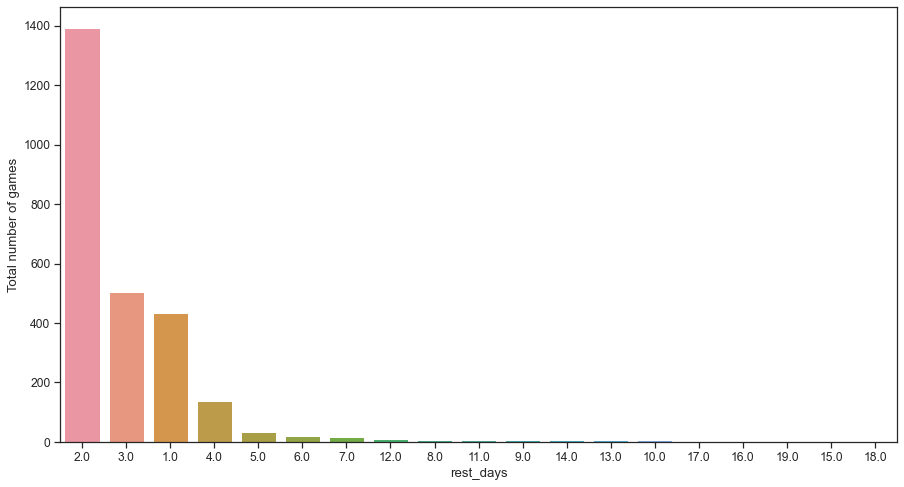

In [65]:
dropFirstGames = df.copy()
dropFirstGames = dropFirstGames.dropna()
dropFirstGames['rest_days'] = pd.to_numeric(dropFirstGames['rest_days'])

plt.figure(figsize=(15,8))
sns.countplot(data=dropFirstGames, x='rest_days', order = dropFirstGames['rest_days'].value_counts().index).set(
    ylabel='Total number of games')

### Plot of total number of games played with x amount of rest days prior

The first thing that needs to be addressed is that there is a large multitude of different rest days. This is due to the 2021 NHL schedule trying to fit in a break for the olympics and also because many games were postponed due to covid outbreaks. To try and account for some of the weird scheduling, I will group up the games that had 5 days of rest or more

[Text(0, 0.5, 'Total number of games')]

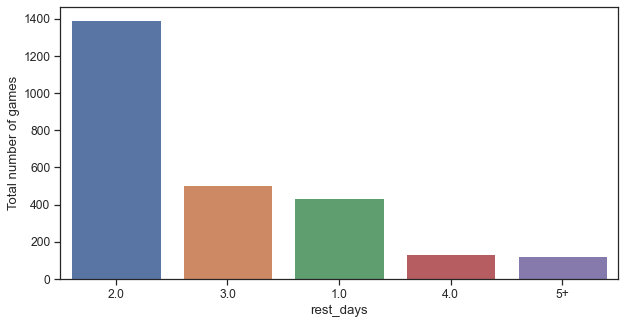

In [66]:
dropFirstGames['rest_days'] = np.where(dropFirstGames['rest_days'] > 4, "5+", dropFirstGames['rest_days'])

plt.figure(figsize=(10,5))
sns.countplot(data=dropFirstGames, x='rest_days', order = dropFirstGames['rest_days'].value_counts().index).set(
    ylabel='Total number of games')

### Plot of Total number of games compared to rest days with 5+ days grouped up

Now the graph a lot simpler! Time to break down the chart into Wins, Losses, and Overtime Losses to see if there are any patterns

<AxesSubplot:xlabel='rest_days', ylabel='count'>

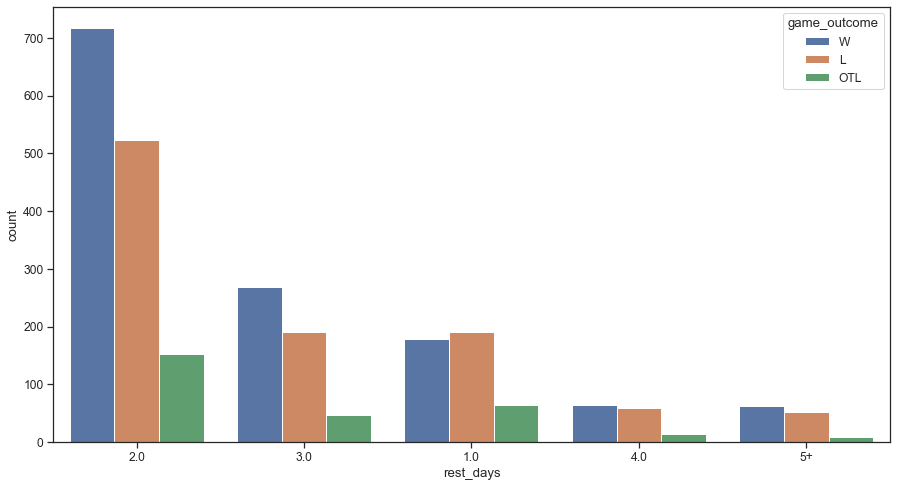

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(data=dropFirstGames, x='rest_days', hue='game_outcome', hue_order=['W','L','OTL'], order = dropFirstGames['rest_days'].value_counts().index)

### Breakdown of W/L/OTL compared to rest days

Here we can make an interesting observation, most of the rest days seem to be mostly even between wins and losses/overtime losses except for 1 day of rest. On 1 day of rest, teams start to lose more and have a substantially higher overtime loss ratio compared to wins. But this might not be a fair assessment as it might be only bad teams being given packed schedules, I will check the average rating for each of these groups to make sure that's not the case.

In [68]:
restDayRating = [
    dropFirstGames.loc[dropFirstGames['rest_days'] == "1.0", 'team_rating'].mean(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "2.0", 'team_rating'].mean(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "3.0", 'team_rating'].mean(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "4.0", 'team_rating'].mean(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "5+", 'team_rating'].mean()
]

#This line returns a list with the counts of [L,OTL,W]
restDayOutcomes = [
    dropFirstGames.loc[dropFirstGames['rest_days'] == "1.0", 'game_outcome'].value_counts().sort_index(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "2.0", 'game_outcome'].value_counts().sort_index(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "3.0", 'game_outcome'].value_counts().sort_index(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "4.0", 'game_outcome'].value_counts().sort_index(),
    dropFirstGames.loc[dropFirstGames['rest_days'] == "5+", 'game_outcome'].value_counts().sort_index()
]

restList = []

for i, rating in enumerate(restDayRating):
    print(f'{i+1} days of rest has a mean rating of: {rating:.2f} and a win rate of {restDayOutcomes[i][2]/(sum(restDayOutcomes[i])):.1%}')
    restList.append([i+1, rating, (restDayOutcomes[i][2]/(sum(restDayOutcomes[i])))])

# print(restList)
# rest_df = pd.DataFrame(restList, columns=['days_rest','rating', 'winrate'])

# ax = sns.lineplot(data=rest_df, x='days_rest', y='winrate')
# ax2 = plt.twinx()
# sns.lineplot(data=rest_df,  x='days_rest', y='rating', color="r", ax=ax2)


1 days of rest has a mean rating of: 1501.57 and a win rate of 41.2%
2 days of rest has a mean rating of: 1506.93 and a win rate of 51.5%
3 days of rest has a mean rating of: 1501.07 and a win rate of 53.3%
4 days of rest has a mean rating of: 1500.90 and a win rate of 47.1%
5 days of rest has a mean rating of: 1506.95 and a win rate of 50.8%


This proves that there is not a significant difference between the ratings for each group of rest day amounts and we can conclude that having more than 1 day of rest helps win games!

### Question 2: Are there any teams that play better on the 2nd of back to backs games? Are there any that play substantially worse?

In the previous question we found out that back to back games (1 day of rest) had a significant decrease in win rate. To add onto this, I want to see if there was any specific teams that played signficiantly better or worse than the average 1 day rest win rate of 41.2%. It might be able to help us win some big sports bets :)

The first thing I'm going to do is to make a new dataframe that is only back to back games, that way I can dive deeper into how specific teams did.

<Figure size 1080x576 with 0 Axes>

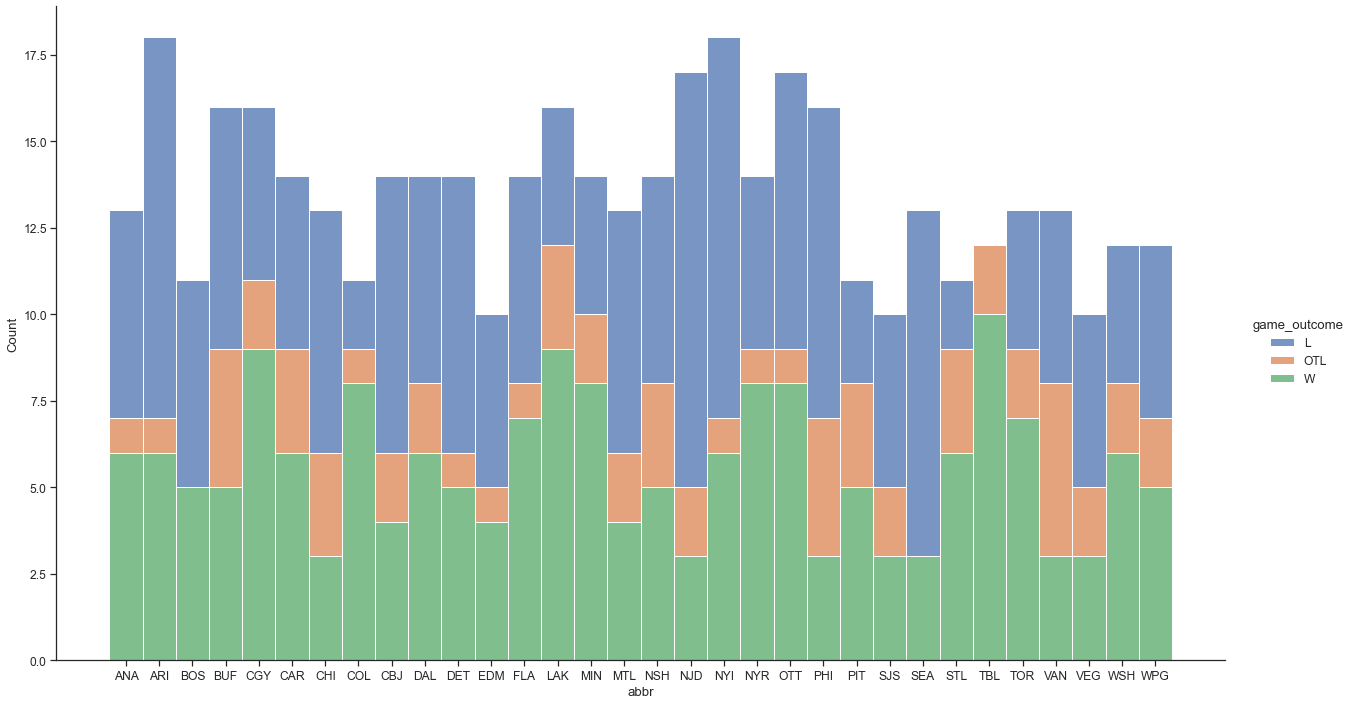

In [69]:
b2b_df = dropFirstGames[dropFirstGames['rest_days']=="1.0"]
plt.figure(figsize=(15,8))

sns.displot(data=b2b_df, x='abbr', hue='game_outcome', multiple='stack', height=10, aspect=1.75)

After plotting 

<AxesSubplot:xlabel='abbr', ylabel='winrate'>

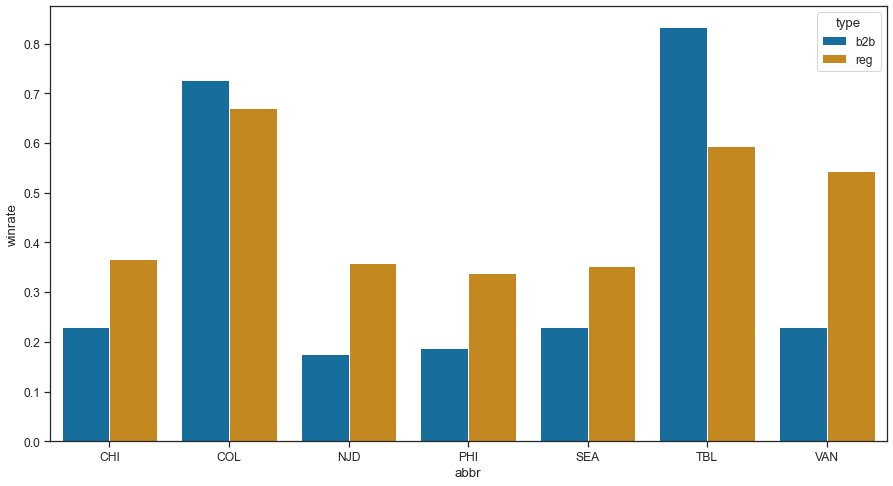

In [70]:
# Messy code to count find the winrates of teams for back to backs games, and games with 2+ days
# of rest. Plotted them on a bargraph to see the differences

teamResults = []
for team in b2b_df['abbr'].unique():
    results = {'name': team, 'outcomePercentage': b2b_df.loc[b2b_df['abbr'] == team, 'game_outcome'].value_counts(normalize=True).sort_index(ascending=False)}
    teamResults.append(results)

teams = []
for team in teamResults:
    if team['outcomePercentage'][0] < 0.25 or team['outcomePercentage'][0] > 0.70:
        teams.append([team['name'], team['outcomePercentage'][0], 'b2b'])
        

nonb2b_df = dropFirstGames[dropFirstGames['rest_days']!="1.0"]
nonb2bResults = []
for team in nonb2b_df['abbr'].unique():
    results = {'name': team, 'outcomePercentage': nonb2b_df.loc[nonb2b_df['abbr'] == team, 'game_outcome'].value_counts(normalize=True).sort_index(ascending=False)}
    nonb2bResults.append(results)

teams2 = []
for team in nonb2bResults:
    if team['name'] in ['TBL', 'COL', 'CHI', 'SEA', 'VAN', 'PHI', 'NJD']:
        teams2.append([team['name'], team['outcomePercentage'][0], 'reg'])
        
nonb2b_df = pd.DataFrame(teams2, columns=['abbr','winrate', 'type'])
outlier_df = pd.DataFrame(teams, columns=['abbr','winrate', 'type'])
outlier_df = pd.concat([outlier_df, nonb2b_df])

plt.figure(figsize=(15,8))
sns.barplot(data=outlier_df, x='abbr', y='winrate', hue='type', palette='colorblind')

This graph shows that the teams that did terrible in back to backs all had a low win rate with normal rest. The interesting observation is that the Canucks are apparently disproportionately bad at back to backs, having their win rate decrease by more than half! It is also interesting to see that back to back games didn't seem to affect Colorado or Tampa at all, with Tampa's win rate increasing? Interesting

### Question 3: Who are the most consistent underdogs?

Everyone loves an underdogs, did you know that one of the losses for the record breaking 73-9 warriors team was an awful Lakers team that finished the season 17-65? Let's see which teams are the 'best' underdogs!

<AxesSubplot:xlabel='abbr', ylabel='count'>

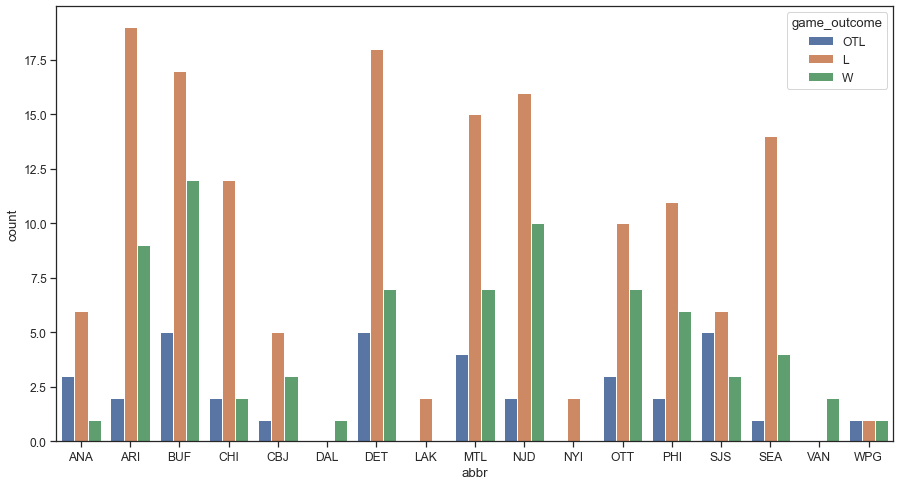

In [71]:
underdog_df = df[(df['rating_diff'] < -100)]
underdog_df

plt.figure(figsize=(15,8))
sns.countplot(data=underdog_df, x='abbr', hue='game_outcome')

Here I filtered for games that had a 100 point rating disadvantage. This is a significant difference in team skill and should be around the difference between Vegas (43-31-8) and Arizona (25-50-7). We are going to drop Chicago and Anaheim since they lost the majority of underdog games and have lost the privilege of being called consistent underdogs, also dropping Dallas cause they only have 1 game. I want to check for the goal difference in these games to ensure to not pay attention to teams that are consistently getting blown out

<AxesSubplot:xlabel='abbr', ylabel='count'>

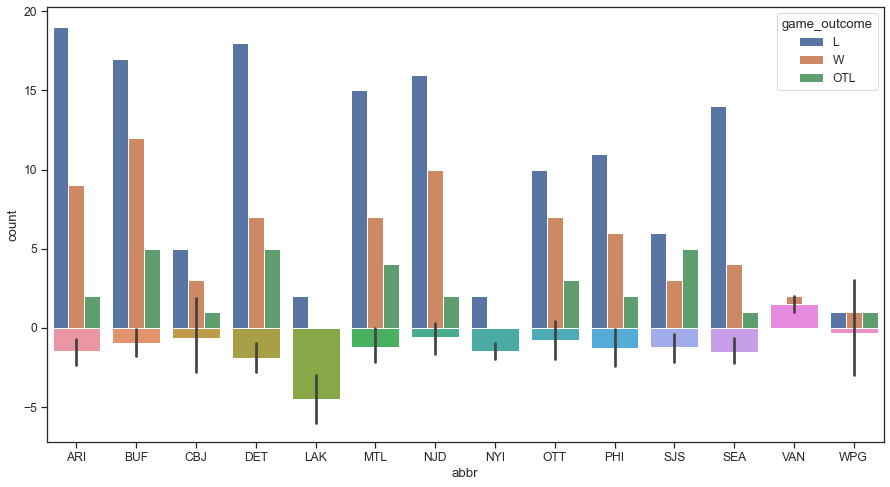

In [72]:
underdog_df = underdog_df[(underdog_df['abbr']!= 'CHI')]
underdog_df = underdog_df[(underdog_df['abbr']!= 'ANA')]
underdog_df = underdog_df[(underdog_df['abbr']!= 'DAL')]
# underdog_df
plt.figure(figsize=(15,8))
sns.countplot(data=underdog_df, x='abbr', hue='game_outcome')
sns.barplot(data=underdog_df, x='abbr', y=(underdog_df['gf'] - underdog_df['ga']))

The funny thing about this graph is that in the 2 underdog games that the Kings played, they got absolutely blown out. Vancouver on the other hand clutched up big time in their 2 underdog wins. 

Two teams with wild amounts of variance in underdog games were Winnipeg and Colombus.

The most consistent underdogs based on their underdog record and score differentials were:
1. Vancouver
1. Buffalo
1. San Jose
1. Ottowa